In [1]:
import MDAnalysis as mda
from numpy import *
import os
from pylab import *
import MDAnalysis.analysis.distances
import MDAnalysis.analysis.rms
from MDAnalysis.analysis import align
import glob
#import umap
import scipy.stats
import sklearn
import sklearn.decomposition
import sklearn.preprocessing
import mdtraj
import pandas as pd
import seaborn as sns
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
from MDAnalysis.analysis.dihedrals import Dihedral

In [2]:
EQPOINT=250



h2opath="data/water/solvent_included/"
pegpath="data/peg/solvent_included/"

#glob tprs
h2ogros=sorted(glob.glob(h2opath+"*.gro"))
peggros=sorted(glob.glob(pegpath+"*.gro"))

#glob tprs
h2otprs=sorted(glob.glob(h2opath+"*.tpr"))
pegtprs=sorted(glob.glob(pegpath+"*.tpr"))

#trjs
h2otrjs=sorted(glob.glob(h2opath+"*.xtc"))
pegtrjs=sorted(glob.glob(pegpath+"*.xtc"))

systemtprs=[h2otprs,pegtprs]
systemtrjs=[h2otrjs,pegtrjs]



#get universes 
h2ou=[]
pegu=[]


resids_proper=list(arange(-4,67))+list(arange(69,238))
resids=list(arange(-4,67))+[nan,nan]+list(arange(69,238))


for i in range(len(h2ogros)):
    h2ou.append(mda.Universe(h2otprs[i],h2otrjs[i]))
    #fix resids immediately
    h2ou[i].select_atoms("protein or resname CH6").residues.resids = resids_proper
for i in range(len(peggros)):
    pegu.append(mda.Universe(pegtprs[i],pegtrjs[i]))
    #fix resids immediately
    pegu[i].select_atoms("protein or resname CH6").residues.resids = resids_proper

#compile all the systems in one list
systems = [h2ou,pegu]
system_names = ['No-PEG','PEG']
#[]
#[tol-darkgreen,tol-darkblue,tol-bottompurple]
twoColour=["#332288","#882255"]
# Dark green,    
#sixColor=['#0A732D','#332288','#88CCEE',"#44AA99",'#882255','#D250BC']
#colorScheme=sixColor
colourScheme = twoColour
# Let's set up the selections for each trajectory by chain

# i want to make a list that has the sh2 domains selected in each sublist so that each one has 6 selections.
h2ou_fullprotein=[]
pegu_fullprotein=[]

h2ou_fullprotein_string=[]
pegu_fullprotein_string=[]


h2ou_notail=[]
pegu_notail=[]


h2ou_notail_string=[]
pegu_notail_string=[]


for i in range(len(h2otrjs)):
    h2ou_notail.append(h2ou[i].select_atoms("(protein or resname CH6) and resid 1:228"))
    h2ou_notail_string.append("(protein or resname CH6) and resid 1:228")
    h2ou_fullprotein.append(h2ou[i].select_atoms("(protein or resname CH6)"))
    h2ou_fullprotein_string.append("(protein or resname CH6)")
    
for i in range(len(pegtrjs)):
    pegu_notail.append(pegu[i].select_atoms("(protein or resname CH6) and resid 1:228"))
    pegu_notail_string.append("(protein or resname CH6) and resid 1:228")
    pegu_fullprotein.append(pegu[i].select_atoms("(protein or resname CH6)"))
    pegu_fullprotein_string.append("(protein or resname CH6)")

fullprotein_selections=[h2ou_fullprotein,pegu_fullprotein]
fullprotein_selections_string=[h2ou_fullprotein_string,pegu_fullprotein_string]
notail_selections = [h2ou_notail,pegu_notail]
notail_selections_string = [h2ou_notail_string,pegu_notail_string]



In [3]:
def AllToSystem(allList):
    
    systemavg=[]
    systemsem=[]
    for i in range(len(allList)):
        systemavg.append(mean(allList[i],axis = 0))
        systemsem.append(scipy.stats.sem(allList[i],axis = 0))
        
    return systemavg,systemsem

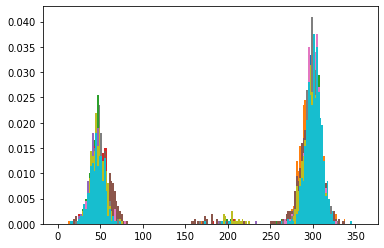

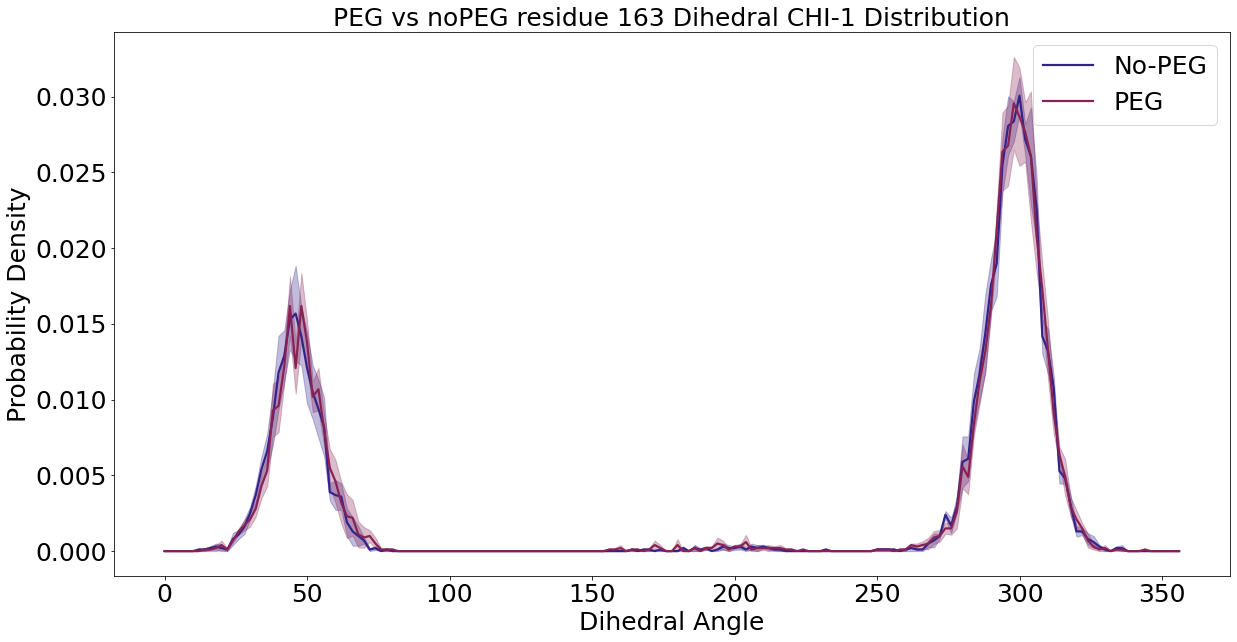

In [14]:
all_163_chi1=[]
all_163_chi1_x=[]

for i in range(len(systems)):
    sub=[]
    sub2=[]
    for j in range(len(systems[i])):
        tu = systems[i][j]
        r = tu.select_atoms("resid 163")
        J = MDAnalysis.analysis.dihedrals.Janin(r).run()
        
        distribution=hist(J.angles.T[0][0],bins = arange(0,360,2),density = True)
        
        sub.append(distribution[0])
        sub2.append(distribution[1])
    all_163_chi1.append(sub)
    all_163_chi1_x.append(sub2)
    
    
    system_avg_163_chi1,system_sem_163_chi1 = AllToSystem(all_163_chi1)



figure(figsize = (20,10))
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0],color = colourScheme[0],label = system_names[0],linewidth = 2.2)
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[1],color = colourScheme[1],label = system_names[1],linewidth = 2.2)

fill_between(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0] - system_sem_163_chi1[0],system_avg_163_chi1[0] + system_sem_163_chi1[0],color = colourScheme[0],alpha = 0.3)
fill_between(all_163_chi1_x[1][0][:-1],system_avg_163_chi1[1] - system_sem_163_chi1[1],system_avg_163_chi1[1] + system_sem_163_chi1[1],color = colourScheme[1],alpha = 0.3)


xlabel("Dihedral Angle",fontsize = 25)
ylabel("Probability Density",fontsize = 25)

title("PEG vs noPEG residue 163 Dihedral CHI-1 Distribution",fontsize = 25)
psdfva=xticks(fontsize = 25)
oasdjfo = yticks(fontsize = 25)
legend(fontsize = 25)




In [15]:
save("all_163_chi1.npy",all_163_chi1)

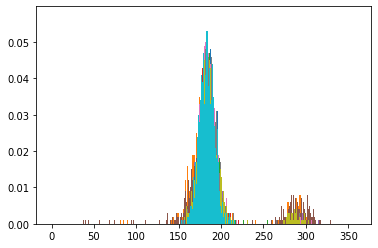

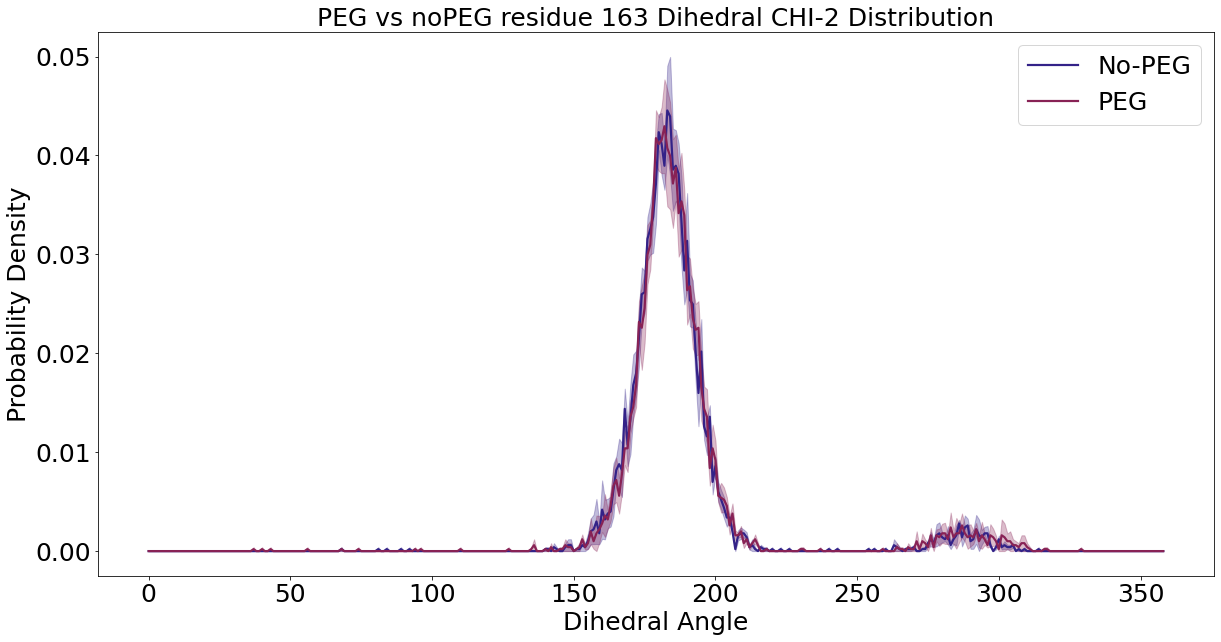

In [5]:
all_163_chi1=[]
all_163_chi1_x=[]

for i in range(len(systems)):
    sub=[]
    sub2=[]
    for j in range(len(systems[i])):
        tu = systems[i][j]
        r = tu.select_atoms("resid 163")
        J = MDAnalysis.analysis.dihedrals.Janin(r).run()
        
        distribution=hist(J.angles.T[1][0],bins = arange(0,360,1),density = True)
        
        sub.append(distribution[0])
        sub2.append(distribution[1])
    all_163_chi1.append(sub)
    all_163_chi1_x.append(sub2)
    
    
    system_avg_163_chi1,system_sem_163_chi1 = AllToSystem(all_163_chi1)



figure(figsize = (20,10))
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0],color = colourScheme[0],label = system_names[0],linewidth = 2.2)
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[1],color = colourScheme[1],label = system_names[1],linewidth = 2.2)

fill_between(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0] - system_sem_163_chi1[0],system_avg_163_chi1[0] + system_sem_163_chi1[0],color = colourScheme[0],alpha = 0.3)
fill_between(all_163_chi1_x[1][0][:-1],system_avg_163_chi1[1] - system_sem_163_chi1[1],system_avg_163_chi1[1] + system_sem_163_chi1[1],color = colourScheme[1],alpha = 0.3)


xlabel("Dihedral Angle",fontsize = 25)
ylabel("Probability Density",fontsize = 25)

title("PEG vs noPEG residue 163 Dihedral CHI-2 Distribution",fontsize = 25)
psdfva=xticks(fontsize = 25)
oasdjfo = yticks(fontsize = 25)
legend(fontsize = 25)




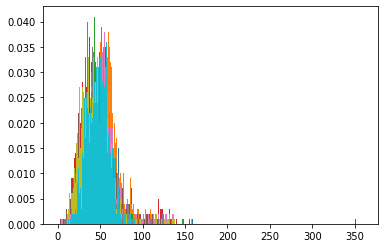

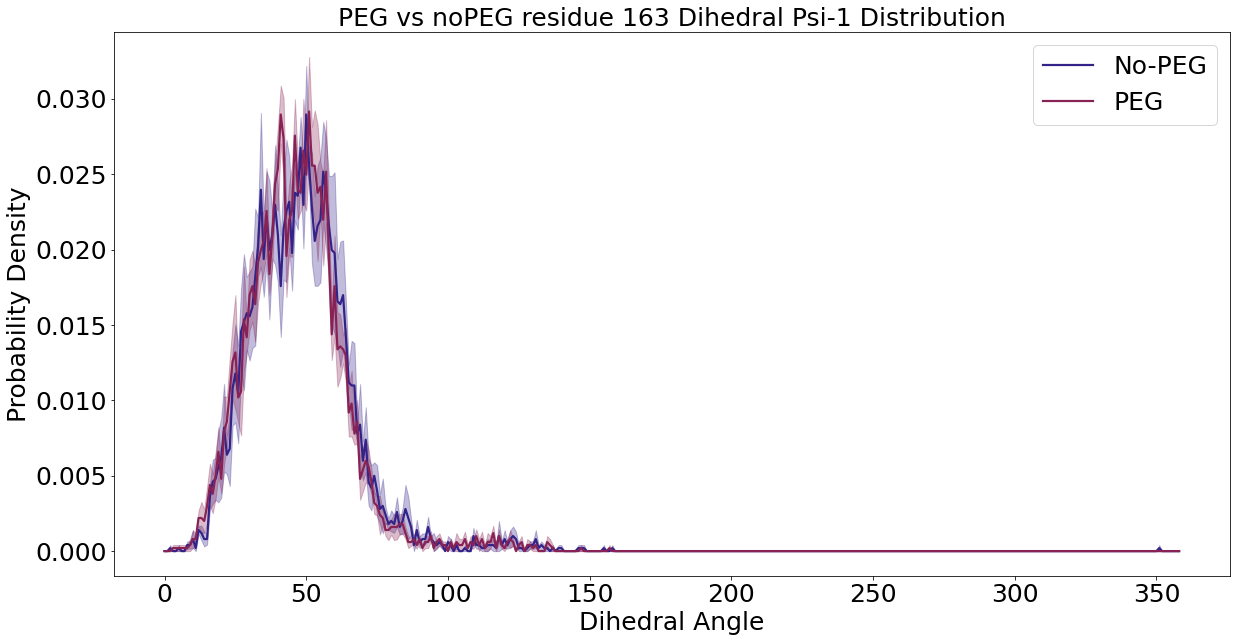

In [6]:
all_163_chi1=[]
all_163_chi1_x=[]

for i in range(len(systems)):
    sub=[]
    sub2=[]
    for j in range(len(systems[i])):
        tu = systems[i][j]
        r = tu.select_atoms("resid 163")
        J = MDAnalysis.analysis.dihedrals.Ramachandran(r).run()
        
        distribution=hist(J.angles.T[0][0]+180,bins = arange(0,360,1),density = True)
        
        sub.append(distribution[0])
        sub2.append(distribution[1])
    all_163_chi1.append(sub)
    all_163_chi1_x.append(sub2)
    
    
    system_avg_163_chi1,system_sem_163_chi1 = AllToSystem(all_163_chi1)



figure(figsize = (20,10))
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0],color = colourScheme[0],label = system_names[0],linewidth = 2.2)
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[1],color = colourScheme[1],label = system_names[1],linewidth = 2.2)

fill_between(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0] - system_sem_163_chi1[0],system_avg_163_chi1[0] + system_sem_163_chi1[0],color = colourScheme[0],alpha = 0.3)
fill_between(all_163_chi1_x[1][0][:-1],system_avg_163_chi1[1] - system_sem_163_chi1[1],system_avg_163_chi1[1] + system_sem_163_chi1[1],color = colourScheme[1],alpha = 0.3)


xlabel("Dihedral Angle",fontsize = 25)
ylabel("Probability Density",fontsize = 25)

title("PEG vs noPEG residue 163 Dihedral Psi-1 Distribution",fontsize = 25)
psdfva=xticks(fontsize = 25)
oasdjfo = yticks(fontsize = 25)
legend(fontsize = 25)




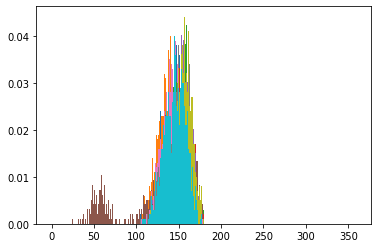

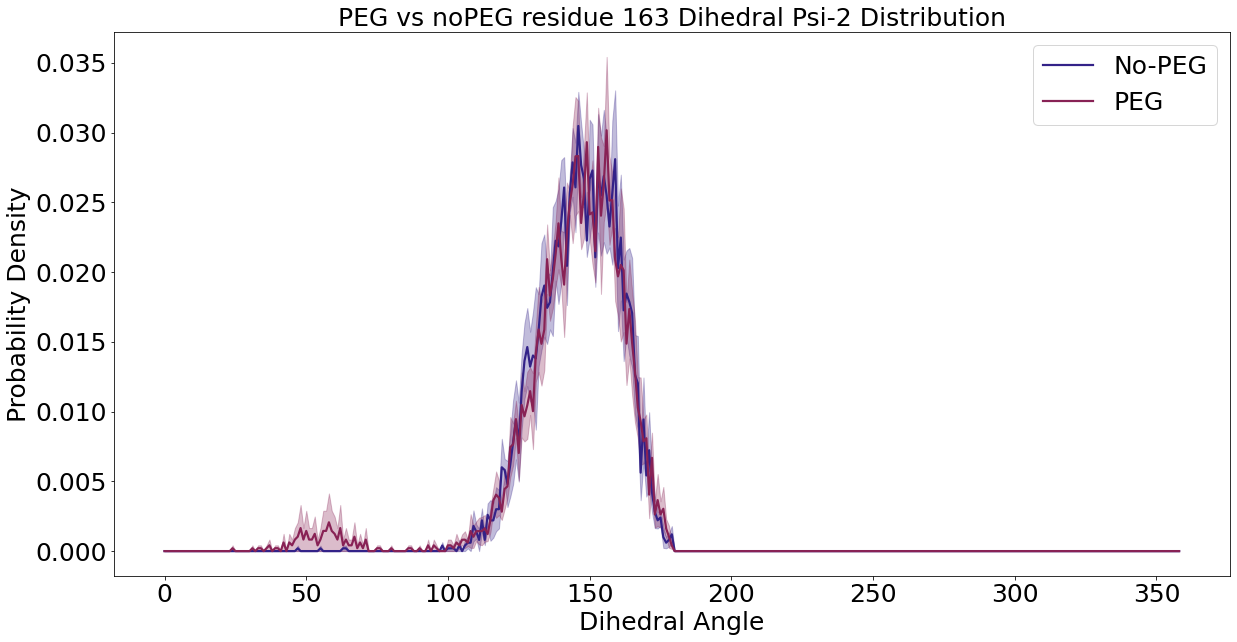

In [7]:
all_163_chi1=[]
all_163_chi1_x=[]

for i in range(len(systems)):
    sub=[]
    sub2=[]
    for j in range(len(systems[i])):
        tu = systems[i][j]
        r = tu.select_atoms("resid 163")
        J = MDAnalysis.analysis.dihedrals.Ramachandran(r).run()
        
        distribution=hist(J.angles.T[1][0],bins = arange(0,360,1),density = True)
        
        sub.append(distribution[0])
        sub2.append(distribution[1])
    all_163_chi1.append(sub)
    all_163_chi1_x.append(sub2)
    
    
    system_avg_163_chi1,system_sem_163_chi1 = AllToSystem(all_163_chi1)



figure(figsize = (20,10))
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0],color = colourScheme[0],label = system_names[0],linewidth = 2.2)
plot(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[1],color = colourScheme[1],label = system_names[1],linewidth = 2.2)

fill_between(all_163_chi1_x[0][0][:-1],system_avg_163_chi1[0] - system_sem_163_chi1[0],system_avg_163_chi1[0] + system_sem_163_chi1[0],color = colourScheme[0],alpha = 0.3)
fill_between(all_163_chi1_x[1][0][:-1],system_avg_163_chi1[1] - system_sem_163_chi1[1],system_avg_163_chi1[1] + system_sem_163_chi1[1],color = colourScheme[1],alpha = 0.3)


xlabel("Dihedral Angle",fontsize = 25)
ylabel("Probability Density",fontsize = 25)

title("PEG vs noPEG residue 163 Dihedral Psi-2 Distribution",fontsize = 25)
psdfva=xticks(fontsize = 25)
oasdjfo = yticks(fontsize = 25)
legend(fontsize = 25)


